Dataset - http://archive.ics.uci.edu/ml/datasets/Twenty+Newsgroups
1. Perform Test Classification using Multinomial Naive Bayes(already implemented in sklearn).
2. Implement Naive Bayes on your own from scratch for text classification. 
3. Compare Results of your implementation of Naive Bayes with one in Sklearn.

In [1]:
## Stopwords have been imported from nltk
##Instead of split , I used tokenizer
## Instead of manually downloading the data from the internet, I have downloaded it using sklearn.datasets.fetch_20newsgroups

In [2]:
import nltk


In [3]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.naive_bayes import MultinomialNB

In [4]:
from sklearn.datasets import fetch_20newsgroups
import string

In [5]:
newsgroups=fetch_20newsgroups(shuffle=False, remove=('headers', 'footers')) 
#instead of the link, I have fetched the data through sklearn itself just to reduce the amount of unnecessary work.
stops=set(stopwords.words('english'))
#these are the stopwords which we don't want to include in out vocabulary.
punctuations=list(string.punctuation)
#punctuation marks also should be removed from our vocabulary.
stops.update(punctuations)
#i have created a set of stop words and updated it with all the punctuation marks
newsgroups.keys()
#now we have all the unnecessary words and punctuation marks in our set "stops"
#lets check what keys do we have in our data.

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [6]:
#later on while debugging the code i realised that there are more stop words still residing there in these documents apart from
#those i have already included.
# so i copied more stop words from the internet and imported them using numpy.loadtxt() and updated my set of stop words.
more_stops=np.loadtxt("stopwords_en.txt", dtype=str, delimiter=" ")
stops.update(more_stops)
len(stops)
#now we have these many stop words...

631

In [7]:
len(newsgroups.data)

11314

In [8]:
newsgroups

{'data': ["gajarsky@pilot.njin.net writes:\n\nmorgan and guzman will have era's 1 run higher than last year, and\n the cubs will be idiots and not pitch harkey as much as hibbard.\n castillo won't be good (i think he's a stud pitcher)",
  'Well, I just got my Centris 610 yesterday.  It took just over two \nweeks from placing the order.  The dealer (Rutgers computer store) \nappologized because Apple made a substitution on my order.  I ordered\nthe one without ethernet, but they substituted one _with_ ethernet.\nHe wanted to know if that would be "alright with me"!!!  They must\nbe backlogged on Centri w/out ethernet so they\'re just shipping them\nwith!  \n\n\tAnyway, I\'m very happy with the 610 with a few exceptions.  \nBeing nosy, I decided to open it up _before_ powering it on for the first\ntime.  The SCSI cable to the hard drive was only partially connected\n(must have come loose in shipping).  No big deal, but I would have been\npissed if I tried to boot it and it wouldn\'t come

In [9]:
all_documents=newsgroups.data
#all_documents contains all the "X" data in un-tokenized form.
all_categories=newsgroups.target
#all_cateories contain all the "Y" data.
all_documents_modified=[word_tokenize(doc) for doc in all_documents]
#i have modified the all_documents to a form in which we have list of list of words(tokenized data for each document)

In [10]:
#splitting these documents in train and test data.
x_train, x_test, y_train, y_test=train_test_split(all_documents_modified, all_categories, random_state=2,train_size=0.60)

In [11]:
all_words=[]
#this variable is going to contain all the words from all our tokenized documents.
for doc in x_train:
    for word in doc:
        if (word.lower() not in stops) and len(word)!=1 and len(word)!=2 and word[0]!="'" and word!="n't" and word[0]!=".":
            #I dont't want to include words with length 1 and 2 in my vocabulary because these words are pretty much useless.
            # and they might either be the stops which are not there in "stops" variable or some punctuation marks which are
            # not there in "punctuations" variable. apart from the words of length 1 and 2 i have also removed some words
            # separately because these words are most probably present in all the documents so they are not helping us much in
            # classification.
            all_words.append(word)


In [12]:
len(all_words)

760242

In [13]:
#This function accepts a list and returns a dictionary in which keys are the perticular words in the list and values are
# the frequency of that element in that list.
def freq_dict(all_words):
    dic=dict()
    #it iterates through all the elements in the list and increases the frequency by one if it encounters the same element again.
    for word in all_words:
        if word in dic.keys():
            dic[word]+=1
        else:
            dic[word]=1
    return dic

dic=freq_dict(all_words)
#Now in the "dic" variable we have the frequencies of all the elements of the list "all words".

In [14]:
import numpy as np
#I have imported numpy because my plan is to get the elements in dic.keys() and dic.values() to two separate variables
# namely "freq" and "words". and then i will arrange them in a decreasing fashion of frequency.
freq=np.array([i for i in dic.values()])
words=np.array([i for i in dic.keys()])

In [15]:
words=words[np.argsort(freq)][::-1]
freq=np.sort(freq)[::-1]
#now i have sorted both the arrays and first arranged them in ascending order using np.sort() and np.argsort() and then i have
# reversed the so obtained array to get a descending ordered array.

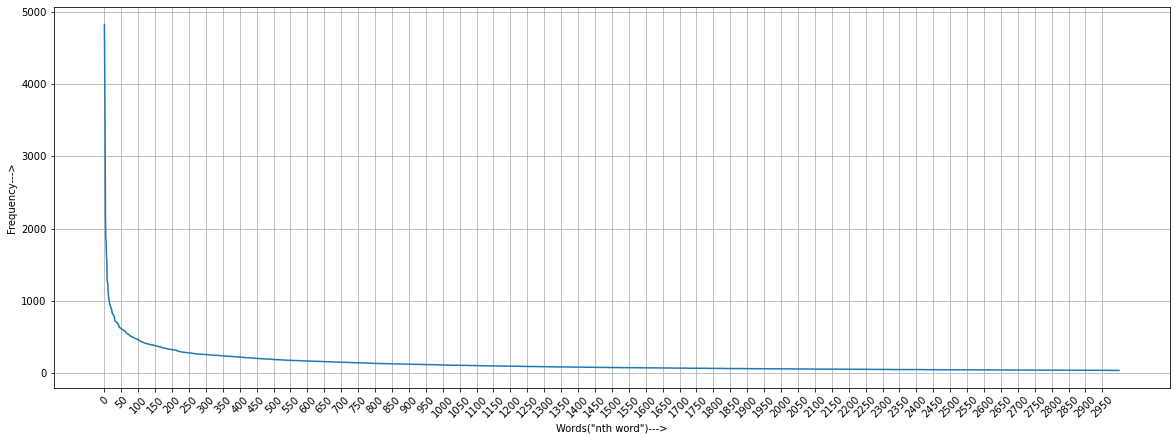

In [16]:
#This cell draws a frequency distribution graph for us to from where we can carefully observe the frequency trend of out list.
import matplotlib.pyplot as plt
#following are the limits for our graph.
lower_limit=0    #default
upper_limit=3000    #default
difference_between_each_xtick=50  #default value. change these values to observe the graph in more depth
#adjusting size of the graph for more clearity.
plt.figure(figsize=(20, 7))
#plotting
plt.plot(np.arange(len(freq))[lower_limit:upper_limit], freq[lower_limit:upper_limit])
#labelling
plt.xlabel('Words("nth word")--->')
plt.ylabel("Frequency--->")
#adjusting the xticks
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=45)
plt.grid()
plt.show()
#observe the following graph by changing the values of lower_limit, upper_limit and difference_between_each_xtick.

In [17]:
features=words[20:12000]
#features variable contains all the top words which are most frequently used in all our documents. 
freq[20], freq[10000]
# since there are 11314 documents I don't want the very high frequency words to get into my final features list as
# they may be present in all the documents which will not help me much for classiication.
# so i have choosen the words having frequency freq[20] to freq[9999]

(907, 11)

In [18]:
len(features)

11980

In [19]:
# This function is the backbone of our Text Classification.
# It takes the patameters x_train or x_test and the list of all features and converts it into a TEXT-CLASSIFICATION-FRIENDLY structure.
# By text-classification-friendly, I mean it converts the data into a 2-D array which contains the frequency of that feature
# in that perticular document. where rows are the documents and columns are the features.
def data_modifier(x_data, features):
    modified_data=np.zeros((len(x_data), len(features)))
    #modified_data currently have a ZEROS numpy array whose shape is (len(x_data), len(features))
    count=0
    #Ignore this "Count" variable. i have created it just to keep an eye on the progress of our algorithm.
    max_count=len(x_data)
    for i in range(len(x_data)):
        #looping over each and every row in the x_data
        current_doc=x_data[i]
        #current_doc contains the current document on which we are iterating.(As the name suggests obviously)
        d=dict()
        #this dictionary contains the frequency of all the elements in our current_doc.
        for word in current_doc:
            if word in d.keys():
                d[word]+=1
            else:
                d[word]=1
        #dictionary created
        for j in range(len(features)):
            #now for each feature in features we will insert the value of the dictionary for the corresponding. that is, 
            #the frequency of each feature in that current document.
            if features[j] in d.keys():
                modified_data[i][j]=d[features[j]]
            else:
                #if the current feature is not in the dictionary, it will remain 0 in the modified_data 2D matrix
                continue
        count+=1
        print("progress: ", (count*100)/max_count, "%")
        #This statement just prints the progress of our data_modifier function.
    #finally I have returned the modified array.
    return modified_data 
#this function takes some time to process because i have considered nearly 3000 features and apart from that we have so many
#documents which contains so many words. so the algorithm has to go through each word in features list for each word in a perticular
#document. and this needs to be done because I think there is probably no other way to create such a modified array from x_data.

In [20]:
x_train_modified = data_modifier(x_train, features)
#training and testing data has to be modified saparately because we cant use the testing data for training purpose
#as both the Training and testing data must be having their own separate vocabularies.

progress:  0.01473187978786093 %
progress:  0.02946375957572186 %
progress:  0.04419563936358279 %
progress:  0.05892751915144372 %
progress:  0.07365939893930465 %
progress:  0.08839127872716558 %
progress:  0.10312315851502651 %
progress:  0.11785503830288745 %
progress:  0.13258691809074838 %
progress:  0.1473187978786093 %
progress:  0.16205067766647024 %
progress:  0.17678255745433116 %
progress:  0.1915144372421921 %
progress:  0.20624631703005303 %
progress:  0.22097819681791397 %
progress:  0.2357100766057749 %
progress:  0.2504419563936358 %
progress:  0.26517383618149676 %
progress:  0.2799057159693577 %
progress:  0.2946375957572186 %
progress:  0.30936947554507954 %
progress:  0.3241013553329405 %
progress:  0.33883323512080143 %
progress:  0.3535651149086623 %
progress:  0.36829699469652327 %
progress:  0.3830288744843842 %
progress:  0.39776075427224517 %
progress:  0.41249263406010606 %
progress:  0.427224513847967 %
progress:  0.44195639363582795 %
progress:  0.45668827

In [21]:
x_test_modified= data_modifier(x_test, features)
#modified testing data

progress:  0.02209456473707468 %
progress:  0.04418912947414936 %
progress:  0.06628369421122404 %
progress:  0.08837825894829872 %
progress:  0.1104728236853734 %
progress:  0.13256738842244808 %
progress:  0.15466195315952275 %
progress:  0.17675651789659744 %
progress:  0.19885108263367213 %
progress:  0.2209456473707468 %
progress:  0.24304021210782148 %
progress:  0.26513477684489617 %
progress:  0.28722934158197083 %
progress:  0.3093239063190455 %
progress:  0.3314184710561202 %
progress:  0.3535130357931949 %
progress:  0.37560760053026954 %
progress:  0.39770216526734425 %
progress:  0.4197967300044189 %
progress:  0.4418912947414936 %
progress:  0.4639858594785683 %
progress:  0.48608042421564296 %
progress:  0.5081749889527176 %
progress:  0.5302695536897923 %
progress:  0.552364118426867 %
progress:  0.5744586831639417 %
progress:  0.5965532479010164 %
progress:  0.618647812638091 %
progress:  0.6407423773751657 %
progress:  0.6628369421122404 %
progress:  0.684931506849315

# Inbuilt NB classifier

In [22]:

#first trying out the inbuilt Multinomial naive bayes classifier.
clf=MultinomialNB()
clf.fit(x_train_modified, y_train)
clf.score(x_test_modified, y_test)
#it seems like a descent score to me beacause we haven't used real text classification algorithms like NLP and all.
#If you want a the best possible accuracy, increase the number of features in the 13th cell to around 50,000.
#you will get nearly 90 percent of accuracy.but i do not recommend it as the 49999th element will have the frequency of just 2.
#and such a feature won't help us much for the classification.

0.7909854175872735

In [23]:
#fit function takes the training data and gives you a dictionary whose keys are the different classes available to classify.
# and for each key, value is another dictionary, whose keys are all the features available to us and value corresponding
# to each key is sum of all the row of training data corresponding to the current class.(the original key or (say) primary key)
def fit(x_train, y_train):
    count=dict()
    for i in range(20):
        needed_docs=x_train[y_train==i]
        #these are all the documents we need to work upon corresponding to the class i.
        count[i]=dict()
        #count is a dictionary whose each key is yet another dictionary.
        count[i]['total']=0
        #it will maintain the total number of words in class i.
        for j in range(len(features)):
            count[i][features[j]]=needed_docs[:, j].sum()
            #it gives me-"how many times jth feature is coming corresponding to class i"
            count[i]['total']+=count[i][features[j]]
            #this additional key named "total" stores the sum of all the values of ith key which signifies the total number of
            # words in class i.
    #returning the dictionary at last.
    return count

#this "probability" function is another backbone of our naive bayes classifier.But before this function please ckeck out 
#predict function given below.
#This "Probability" function takes takes the dictionary, which was originally returned by fit function, the current data point and the current class as its params.
def probability(dictionary, x, current_class):
    probas_for_each_word=[]
    #my plan, here, is to store all the probabilities for each word in features which is available in the current document
    # and then return the logarithmic sum of all these probabilities for that perticular document.
    for i in range(len(x)):
        #iterating through each feature.
        if x[i]!=0:
            #I am skipping those features whose value corresponding to the current document is 0, that is, they are not present
            # in the that document.
            numerator=dictionary[current_class][features[i]]
            #it denotes that how many times that ith feature is occuring in "current_class"
            #this is the numerator of our NON LOGARITHMIC PROBABILITY
            denominator=dictionary[current_class]['total']
            #it denotes that what is the total number of words in the current class.
            #this is the denominator of our NON LOGARITHMIC PROBABILITY
            proba=np.log((numerator+1)/(denominator+len(x)))
            #i have created a variable "proba" which stores the logarithmic probability which also includes the laplace crrection.
            #here "1" with the numerator and len(x) with denominator denotes the laplace correction.
            probas_for_each_word.append(proba)
            #finally i appended "proba" to the probas_for_each_word array.
    #returning the logarithmic sum of all the probabilities. (which can be treated as multiplication of all the probabilities,
    #but multiplying the probabilities simply won't be a good practice as it may nullify the extreamily small probabilities)
    return sum(probas_for_each_word)

#The predict_single function takes a perticular data point "x" from "predict" function and a dictionary which was obtained
#originally from fit function. Before going through this function, you may like to check out the "predict" function.
def predict_single(dic, x):
    classes = dictionary.keys()
    #this variable "classes" maintains all the possible different classes available to us.
    best_p = -1000
    best_class = -1
    #initiated best_p and best_class variables with negative values because we want to consider maximum valued probabilities at
    #the end. In the first run itself they will be replaced by positive values. "best_p" variable denotes the best probability
    #uptill now. and as the name suggests, best_class denotes the best possible class uptill now.
    first_run = True
    #this boolean variable is taken keeping initial negative values in mind
    for current_class in classes:
        #iterating through each and every class in all possible classes.
        p_current_class = probability(dic, x, current_class)
        #p_current_class denotes the probability of current class.
        if (first_run or p_current_class > best_p):
            #if the probability of current class is better than the best probability then i will update the best probability and
            # best_class to probability of current class and the current class respectively.
            best_p = p_current_class
            best_class = current_class
            #updated
        first_run = False
    #returning the best predicted class for the current data point
    return best_class

#The predict function takes testing data and a dictionary as its input, where the dictionary is the one returned from fit function.
def predict(x_test, dic):
    y_pred=[]
    #y_pred maintains all the predicted classes for provided testing data(In modified format---> see the "data_modifier" function).
    for doc in x_test:
        #iterating each document in testing data.
        y_pred.append(predict_single(dic, doc))
        #for each testing data point, we will append the value of predicted class to y_pred. and we will get that value from
        #predict_single function
    #returning the predicted data finally
    return y_pred


In [24]:
dictionary=fit(x_train_modified, y_train)

In [25]:
y_predicted=predict(x_test_modified, dictionary)


In [26]:
from sklearn.metrics import confusion_matrix
#printing the confusion matrix for our own naive bayes classifier.
#here i am manually printing the confusion matrix for a more clear view.
for i in confusion_matrix(y_true=y_test, y_pred=y_predicted):
    for j in i:
        print(j, end="    ")
    print()

151    1    0    1    0    0    0    1    1    0    0    2    0    0    0    14    0    6    1    7    
2    168    4    12    2    27    4    0    0    0    0    3    1    3    3    0    0    0    0    1    
0    24    117    46    6    29    3    1    0    0    0    11    1    0    0    1    0    0    0    1    
1    10    4    172    20    5    5    3    0    1    0    3    5    0    0    2    0    1    0    1    
1    12    0    24    166    7    3    1    0    0    0    4    11    0    1    0    0    0    1    0    
1    21    1    6    1    187    1    0    1    0    0    5    0    0    1    0    0    0    1    0    
3    7    2    18    8    0    157    10    1    1    1    6    17    2    2    0    2    1    3    1    
2    2    1    1    0    4    4    216    9    2    2    6    3    1    2    2    5    1    2    1    
3    2    0    0    0    2    5    22    183    2    2    3    0    0    2    5    4    0    4    1    
3    2    0    0    0    1    0    2    0    197    6   

In [27]:
from sklearn.metrics import classification_report
#printing the classification report for our own naive bayes classifier.
print(classification_report(y_true=y_test, y_pred=y_predicted))

              precision    recall  f1-score   support

           0       0.72      0.82      0.76       185
           1       0.59      0.73      0.65       230
           2       0.90      0.49      0.63       240
           3       0.56      0.74      0.63       233
           4       0.77      0.72      0.74       231
           5       0.69      0.83      0.75       226
           6       0.84      0.65      0.73       242
           7       0.79      0.81      0.80       266
           8       0.91      0.76      0.83       240
           9       0.95      0.88      0.91       223
          10       0.93      0.93      0.93       247
          11       0.74      0.88      0.80       232
          12       0.75      0.65      0.70       243
          13       0.94      0.86      0.90       235
          14       0.91      0.83      0.86       247
          15       0.73      0.86      0.79       233
          16       0.78      0.90      0.84       224
          17       0.86    

##Observations
It seems like recall of some of the classes is excellent while for some other is moderate this is most probably because of selection of features. More accurately we select features, more will be the f1-score, precision and recall values. although from the confusion matrix we can determine that our algorithm is not that bad. Infact it seems to be working very precisely for some classes. And an accuracy of nearly 78% is not that bad. The accuracy is coming out to be equal to the one we got from the inbuilt multinomial naive bayes algorithm. And a better accuracy could be obtained by working on the selection of features. the accuracy can be increased up to 90 percent max by increasing the number of features in the 13th cell to 50,000. but it will not be worthy because as we keep on increasing the number of features the "increase in the accuracy" will keep on decreasing. So it would be more computationally viable to take upto just 10k or 20 k features in our vocabulary for such a dataset.